In [3]:
# This exercise focuses on identifying and removing outliers from the German Credit Data dataset.
# The dataset contains 1000 individuals, each described by 20 attributes (numerical and categorical),
# and labeled as either a good or bad credit risk.
# The goal is to load the data using pandas and analyze it to detect outliers using statistical methods.

import pandas as pd # Pour manipuler les données tabulaires
import numpy as np # Pour les calculs numériques
%matplotlib inline # Pour afficher les graphiques dans le notebook
import seaborn as sbn # Pour les visualisations statistiques
dataset = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/refs/heads/master/Chapter01/Data/german_credit_data.csv'
df = pd.read_csv(dataset, header=0)

In [2]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


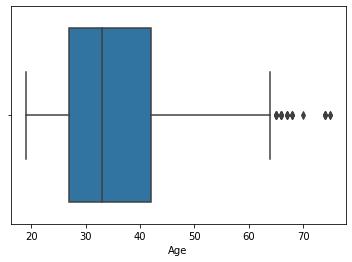

In [4]:
sbn.boxplot(df['Age'])

In [5]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

27.0
42.0
15.0


In [6]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

4.5
64.5


In [8]:
df[((df["Age"] < Lower_Fence) | (df["Age"] > Upper_Fence))]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
75,75,66,male,3,free,little,little,1526,12,car
137,137,66,male,1,own,quite rich,moderate,766,12,radio/TV
163,163,70,male,3,free,little,moderate,7308,10,car
179,179,65,male,2,own,little,little,571,21,car
186,186,74,female,3,free,little,moderate,5129,9,car
187,187,68,male,0,free,little,moderate,1175,16,car
213,213,66,male,3,own,little,rich,1908,30,business
330,330,75,male,3,free,little,little,6615,24,car
430,430,74,male,1,own,little,NaN,3448,5,business


In [9]:
df = df[~((df ["Age"] < Lower_Fence) | (df["Age"] > Upper_Fence))]

In [10]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car
10,10,25,female,2,rent,little,moderate,1295,12,car
